# Crime and Policing Expenditures Exploratory Questions

In this exercise we'll be examining the relationship between crime and policing expenditures using county-level data from Massachusetts. In particular, we're hoping to answer the question "Is there a substantial relationship between crime and policing expenditures?"

## Exercises

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

### Exercise 1

Begin by downloading the data for this exercise from https://github.com/nickeubank/MIDS_Data/blob/master/descriptive_exercise/crime_expend_MA.csv (just go to `github.com/nickeubank/MIDS_Data`, then go to `descriptive_exercise` and get `crime_expend_MA.csv` if you don't want to type all that).


In [84]:
# Reading the data from the pandas DataFrame
crime = pd.read_csv("crime_expend_MA.csv")

crime.head()

,months,county_code,crimeindex,policeexpenditures,month,year
0,0,1,61.411101,32.331110,1,1990
1,0,10,92.779361,59.342067,1,1990
2,0,11,93.222701,50.481508,1,1990
3,0,12,95.588374,65.815540,1,1990
4,0,13,92.472719,38.337757,1,1990


### Exercise 2

This data includes monthly data on both each county's policing expenditures (`policeexpenditures` as share of county budget) and an index of crime (`crimeindex`, scaled 0-100) from 1990 to late 2001. 

In these exercises, we'll be focusing on just two counties -- `county_code` 4 and 10. 

First, for each of these two counties, calculate the mean expenditure level and mean crimeindex score (i.e. calculate both means separately for each county). 

Just to make sure we're practicing applied skills—use a loop to calculate your means and print your results nicely! So you should get output like this (though obviously with different numbers—I'm not gonna give you the answer!):

```
for county 4, average policing expenditure is 23.7 and average crime index is 75.83
for county 10, average policing expenditure is 62.15 and average crime index is 55.88
```

In [85]:
# subset the the dataframe to only include rows with county_code 4 and 10
crime_subset = crime[(crime["county_code"] == 4) | (crime["county_code"] == 10)]

crime_subset.head()

,months,county_code,crimeindex,policeexpenditures,month,year
1,0,10,92.779361,59.342067,1,1990
7,0,4,97.179500,55.384600,1,1990
14,1,10,93.633645,60.638669,2,1990
20,1,4,96.025600,51.538500,2,1990
27,2,10,91.531520,58.727422,3,1990


In [86]:
county_code_array = crime_subset["county_code"].unique()

for i in county_code_array:
    # Filter the data for each county code
    county_data = crime_subset[crime_subset["county_code"] == i]

    # Calculate the mean of police expenditures
    # and crime index for the current county code
    average_policing_expenditure = county_data["policeexpenditures"].mean()
    average_crime_index = county_data["crimeindex"].mean()

    print(
        f"For county {i}, average policing expenditure "
        f"is {round(average_policing_expenditure,2)} "
        f"and average crime index is {round(average_crime_index,2)}"
    )

For county 10, average policing expenditure is 54.24 and average crime index is 47.77
For county 4, average policing expenditure is 54.26 and average crime index is 47.83


### Exercise 3

Now calculate the standard deviation of both expenditures and crime for these two counties.

In [87]:
for i in county_code_array:
    # Filter the data for each county code
    county_data = crime_subset[crime_subset["county_code"] == i]

    # Calculate the std of police expenditures
    # and crime index for the current county code
    std_policing_expenditure = county_data["policeexpenditures"].std()
    std_crime_index = county_data["crimeindex"].std()

    print(
        f"For county {i}, standard deviation of policing expenditure "
        f"is {round(std_policing_expenditure,2)} "
        f"and standard deviation of crime index is {round(std_crime_index,2)}"
    )

For county 10, standard deviation of policing expenditure is 16.68 and standard deviation of crime index is 27.0
For county 4, standard deviation of policing expenditure is 16.77 and standard deviation of crime index is 26.94


### Exercise 4

Now calculate the correlation between `policeexpenditures` and `crimeindex` for both of these counties (again, output the correlations with nicely formatted and labelled statements!)

In [88]:
for i in county_code_array:
    # Filter the data for each county code
    county_data = crime_subset[crime_subset["county_code"] == i]

    # Calculate the correlation between police expenditures
    # and crime index for the current county code
    correlation = county_data["policeexpenditures"].corr(county_data["crimeindex"])

    print(
        f"For county {i}, correlation between police expenditures "
        f"and crime index is {round(correlation,2)}"
    )

For county 10, correlation between police expenditures and crime index is -0.06
For county 4, correlation between police expenditures and crime index is -0.06


### Exercise 5

Based on your results up to this point, what would you guess about whether policing reduces crime? (I know -- this is just a descriptive statistics, and correlation does not imply causality. But what would you infer if this was all you knew?

> Since there is a negative correlation between police expenditures and crime index for both county 10 and county 4, I would infer that police expenditures reduce crime. 

### Exercise 6

Given what you've seen up till now, would you infer that county 4 and county 10 have a similar relationship between crime and police expenditures?

> For both county 4 and county 10, the correlation between police expenditures and crime index is around -0.06. Therefore, I would infer that county 4 and county 10 have a similar relationship between crime and police expenditures.

### Exercise 7

Now plot histograms of `policeexpenditures` for both county 4 and county 10. Do the results change you impression of the similarity of county 4 and county 10?

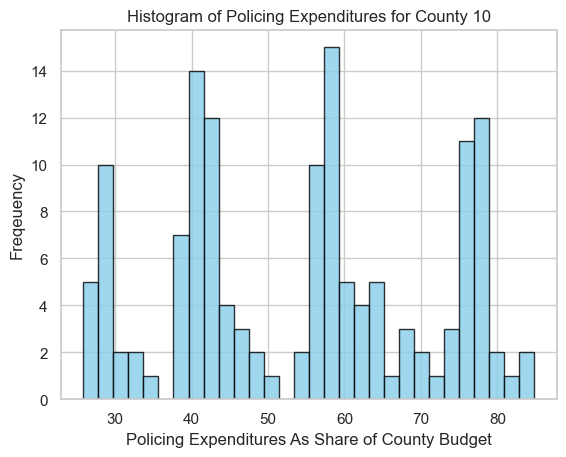

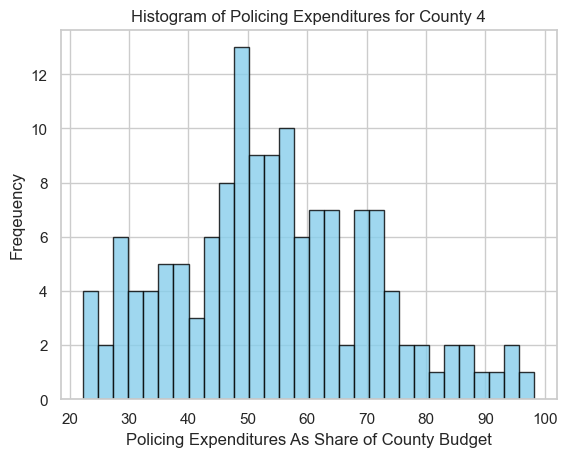

In [89]:
for i in county_code_array:
    # Filter the data for each county code
    county_data = crime_subset[crime_subset["county_code"] == i]

    sns.set(style="whitegrid")

    # Create the histogram of police expenditures
    plt.hist(
        county_data["policeexpenditures"],
        bins=30,
        alpha=0.8,
        color="skyblue",
        edgecolor="black",
    )

    plt.xlabel("Policing Expenditures As Share of County Budget")
    plt.ylabel("Freqeuency")
    plt.title(f"Histogram of Policing Expenditures for County {i}")

    plt.show()

> The result has changed my impression of the similarity of county 4 and county 10. The histogram for County 10 reveals several distinct peaks, with the most frequent monthly policing expenditures from 1990 to late 2001 being around 30%, 40%, 60%, and 80% of the county budget, and the highest frequency exceeding 14. In contrast, the histogram for County 4 exhibits fewer peaks, with the most common monthly policing expenditures for the same period typically centered around 50% of the county budget and the highest frequency just over 12.

### Exercise 8

Finally, create a scatter plot of the relationship between crime and police expenditures for each county (e.g. crime on one axis, police expenditures on the other). Does this change your sense of how similar these are?

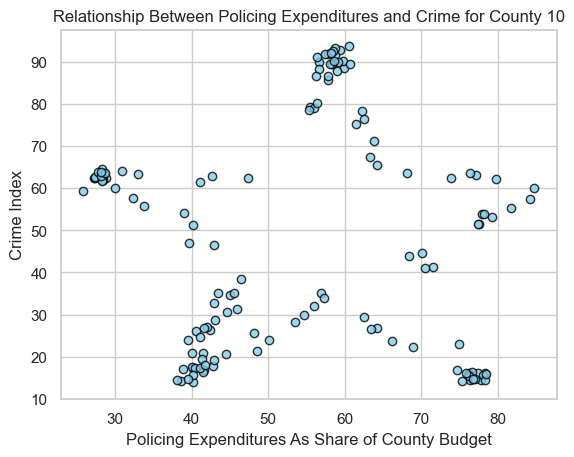

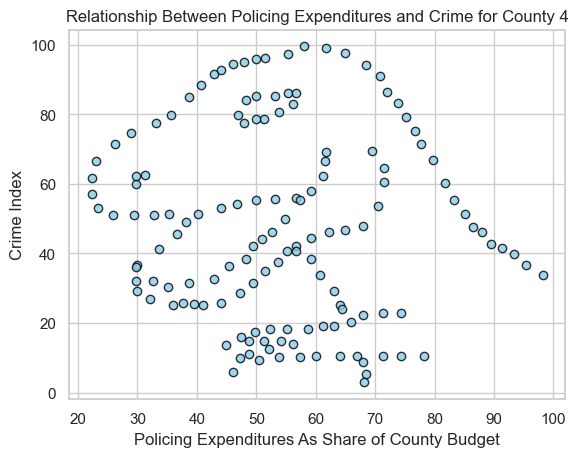

In [90]:
for i in county_code_array:
    # Filter the data for each county code
    county_data = crime_subset[crime_subset["county_code"] == i]

    sns.set(style="whitegrid")

    # Create the scatter plot of police expenditures vs. crime
    plt.scatter(
        county_data["policeexpenditures"],
        county_data["crimeindex"],
        alpha=0.8,
        color="skyblue",
        edgecolor="black",
    )

    plt.xlabel("Policing Expenditures As Share of County Budget")
    plt.ylabel("Crime Index")
    plt.title(f"Relationship Between Policing Expenditures and Crime for County {i}")

    plt.show()

> The scatter plot of the relationship between crime and police expenditures for each county changed my sense of how similar county 10 and county 4 are. The relationship between crime and police expenditures for County 10 is in a shape of a star, while the relationship between crime and police expenditures for County 4 is in the shape of a dinasour. They are completely different. 

## After you have answered...

Read this [discussion page](discussion_exploratory.ipynb).
